# Preprocessing Images

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import os

#function for cropping images
def cropImg(folder_path,output_folder):

    image_files = [f for f in os.listdir(folder_path)]
    left = 100 
    top = 300
    right = 2125
    bottom = 1480
    for image in image_files:
            # Open the image file
            image_path = os.path.join(folder_path, image)
            img = Image.open(image_path)

            # Crop the image using the specified dimensions
            cropped_img = img.crop((left, top, right, bottom))

            # Save the cropped image to the output folder
            output_path = os.path.join(output_folder, f"{image}")
            cropped_img.save(output_path)

In [2]:
folder_path1="Dataset/ECG Images of Myocardial Infarction Patients"
output_folder1="Dataset/CroppedMIPatient"
cropImg(folder_path1,output_folder1)

folder_path2="Dataset/ECG Images of Patient that have abnormal heartbeat"
output_folder2="Dataset/CroppedAbnormal"
cropImg(folder_path2,output_folder2)

folder_path3="Dataset/ECG Images of Patient that have History of MI"
output_folder3="Dataset/CroppedHMIPatient"
cropImg(folder_path3,output_folder3)

folder_path4="Dataset/Normal Person ECG Images"
output_folder4="Dataset/CroppedNormal"
cropImg(folder_path4,output_folder4)

# Data Augmentation

In [9]:
import cv2
import os
import numpy as np
import random

def rotate_image(image, angle):
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

def flip_image(image, flip_code):
    flipped_image = cv2.flip(image, flip_code)
    return flipped_image

def translate_image(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_image

def apply_augmentation(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get all ECG image files in the input folder
    ecg_files = [f for f in os.listdir(input_folder)]
    print("Number of images = ",len(ecg_files))

    for ecg_file in ecg_files:
        # Read the ECG image
        ecg_path = os.path.join(input_folder, ecg_file)
        ecg_image = cv2.imread(ecg_path)

        # Apply data augmentation

        rotated_image = rotate_image(ecg_image, angle=1)
        rotated_image1 = rotate_image(ecg_image, angle=-1)
     
        translation_x, translation_y = 1, 1
        translated_image = translate_image(ecg_image, translation_x, translation_y)
        translated_image1 = translate_image(rotated_image, translation_x, translation_y)

        # Save the augmented image
        output_path = os.path.join(output_folder, f"{ecg_file}")
        cv2.imwrite(output_path, ecg_image)

        output_path = os.path.join(output_folder, f"Trans{ecg_file}")
        cv2.imwrite(output_path, translated_image)

        output_path = os.path.join(output_folder, f"Rot{ecg_file}")
        cv2.imwrite(output_path, rotated_image)

        output_path = os.path.join(output_folder, f"tran{ecg_file}")
        cv2.imwrite(output_path, translated_image1)

        output_path = os.path.join(output_folder, f"ro{ecg_file}")
        cv2.imwrite(output_path, rotated_image1)

        if(output_folder=="Dataset/AugmentedHMIPatient"):
            translated_image2 = translate_image(rotated_image1, translation_x, translation_y)
            translation_x, translation_y = 1.5, 1.5
            translated_image3 = translate_image(ecg_image, translation_x, translation_y)

            output_path = os.path.join(output_folder, f"rotT{ecg_file}")
            cv2.imwrite(output_path, translated_image2)

            output_path = os.path.join(output_folder, f"Trt{ecg_file}")
            cv2.imwrite(output_path, translated_image3)

if __name__ == "__main__":
    # Specify the input folder and output folder
    input_folder="Dataset/CroppedMIPatient"
    output_folder="Dataset/AugmentedMIPatient"
    apply_augmentation(input_folder, output_folder)

    input_folder="Dataset/CroppedHMIPatient"
    output_folder="Dataset/AugmentedHMIPatient"
    apply_augmentation(input_folder, output_folder)

    input_folder="Dataset/CroppedNormal"
    output_folder="Dataset/AugmentedNormal"
    apply_augmentation(input_folder, output_folder)

    input_folder="Dataset/CroppedAbnormal"
    output_folder="Dataset/AugmentedAbnormal"
    apply_augmentation(input_folder, output_folder)


Number of images =  239
Number of images =  172
Number of images =  284
Number of images =  233


# Getting paths of images and storing in an array

In [3]:
normal_path= [
    os.path.join(os.getcwd(), "Dataset/AugmentedNormal", x)
    for x in os.listdir("Dataset/AugmentedNormal")
]
abnormal_path= [
    os.path.join(os.getcwd(), "Dataset/AugmentedAbnormal", x)
    for x in os.listdir("Dataset/AugmentedAbnormal")
]
Mi_path= [
    os.path.join(os.getcwd(), "Dataset/AugmentedMIPatient", x)
    for x in os.listdir("Dataset/AugmentedMIPatient")
]
Hmi_path= [
    os.path.join(os.getcwd(), "Dataset/AugmentedHMIPatient", x)
    for x in os.listdir("Dataset/AugmentedHMIPatient")
]

print("ECG of normal persons = " + str(len(normal_path)))
print("ECG of abnormal persons " + str(len(abnormal_path)))
print("ECG of MI persons = " + str(len(Mi_path)))
print("ECG of HMI persons = " + str(len(Hmi_path)))

ECG of normal persons = 1200
ECG of abnormal persons 1165
ECG of MI persons = 1195
ECG of HMI persons = 1140


# Creating a label array

In [4]:
import numpy as np

abnormal_labels = np.array([0 for _ in range(len(abnormal_path))])
normal_labels = np.array([1 for _ in range(len(normal_path))])
mi_labels= np.array([2 for _ in range(len(Mi_path))])
hmi_labels= np.array([3 for _ in range(len(Hmi_path))])


# Combining image paths and labels

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Combine image paths and labels into tuples
abnormal_data = list(zip(abnormal_path, abnormal_labels))
normal_data = list(zip(normal_path, normal_labels))
mi_data = list(zip(Mi_path, mi_labels))
hmi_data = list(zip(Hmi_path, hmi_labels))

data=[]
data.extend(abnormal_data)
data.extend(normal_data)
data.extend(mi_data)
data.extend(hmi_data)

X_paths = np.array([image_path for image_path, _ in data])
y = np.array([label for _, label in data])


# AlexNet Model

Epoch [1/16], Loss: 1.3861, Accuracy: 0.2479
Epoch [2/16], Loss: 1.3076, Accuracy: 0.4160
Epoch [3/16], Loss: 1.1516, Accuracy: 0.5457
Epoch [4/16], Loss: 0.9903, Accuracy: 0.5309
Epoch [5/16], Loss: 0.8675, Accuracy: 0.6777
Epoch [6/16], Loss: 0.7762, Accuracy: 0.7021
Epoch [7/16], Loss: 0.5675, Accuracy: 0.8596
Epoch [8/16], Loss: 0.3606, Accuracy: 0.8979
Epoch [9/16], Loss: 0.2519, Accuracy: 0.8957
Epoch [10/16], Loss: 0.1665, Accuracy: 0.9245
Epoch [11/16], Loss: 0.1692, Accuracy: 0.9319
Epoch [12/16], Loss: 0.1058, Accuracy: 0.9606
Epoch [13/16], Loss: 0.0638, Accuracy: 0.9755
Epoch [14/16], Loss: 0.0316, Accuracy: 0.9830
Epoch [15/16], Loss: 0.0149, Accuracy: 0.9904
Epoch [16/16], Loss: 0.0106, Accuracy: 0.9851
Fold 1, Accuracy: 0.9851063829787234, Precision: 0.9857611256363116, Recall: 0.9851063829787234, F1 Score: 0.9851960897986713


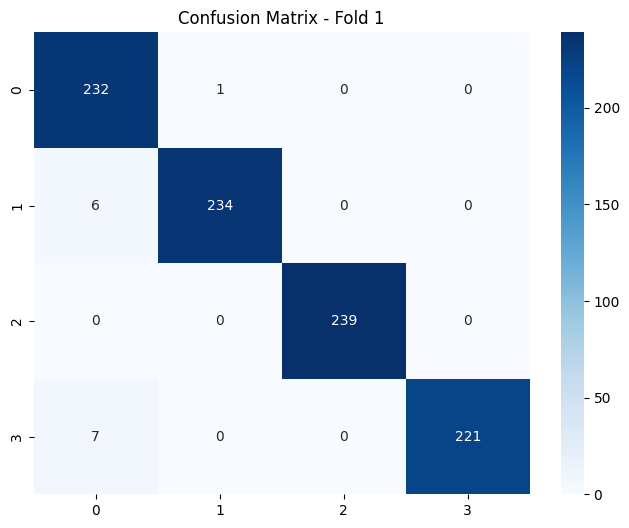

Epoch [1/16], Loss: 1.3869, Accuracy: 0.4011
Epoch [2/16], Loss: 1.3290, Accuracy: 0.3819
Epoch [3/16], Loss: 1.1532, Accuracy: 0.4755
Epoch [4/16], Loss: 1.0028, Accuracy: 0.5894
Epoch [5/16], Loss: 0.8848, Accuracy: 0.6468
Epoch [6/16], Loss: 0.7717, Accuracy: 0.6809
Epoch [7/16], Loss: 0.5877, Accuracy: 0.6298
Epoch [8/16], Loss: 0.5436, Accuracy: 0.8543
Epoch [9/16], Loss: 0.3357, Accuracy: 0.8745
Epoch [10/16], Loss: 0.2419, Accuracy: 0.9213
Epoch [11/16], Loss: 0.1830, Accuracy: 0.9330
Epoch [12/16], Loss: 0.1390, Accuracy: 0.9468
Epoch [13/16], Loss: 0.0834, Accuracy: 0.9223
Epoch [14/16], Loss: 0.1004, Accuracy: 0.9617
Epoch [15/16], Loss: 0.0430, Accuracy: 0.9521
Epoch [16/16], Loss: 0.0501, Accuracy: 0.9777
Fold 2, Accuracy: 0.9776595744680852, Precision: 0.9780389726922791, Recall: 0.9776595744680852, F1 Score: 0.977617461354037


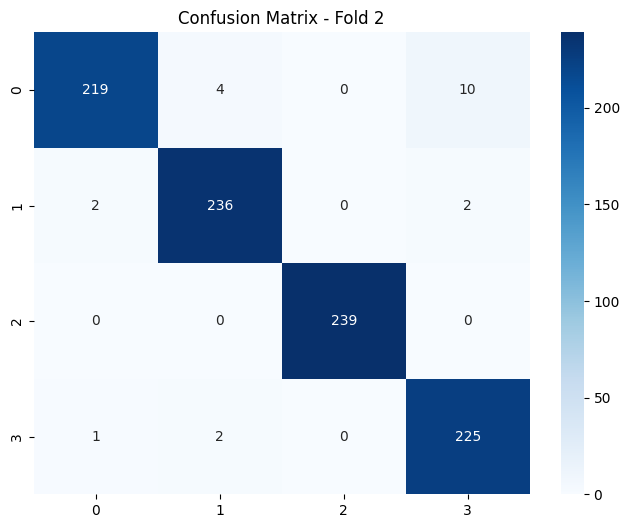

Epoch [1/16], Loss: 1.3872, Accuracy: 0.2426
Epoch [2/16], Loss: 1.3733, Accuracy: 0.4755
Epoch [3/16], Loss: 1.3368, Accuracy: 0.3457
Epoch [4/16], Loss: 1.1613, Accuracy: 0.5904
Epoch [5/16], Loss: 0.9927, Accuracy: 0.6053
Epoch [6/16], Loss: 0.8863, Accuracy: 0.5521
Epoch [7/16], Loss: 0.7738, Accuracy: 0.7734
Epoch [8/16], Loss: 0.6369, Accuracy: 0.8223
Epoch [9/16], Loss: 0.3878, Accuracy: 0.8032
Epoch [10/16], Loss: 0.3088, Accuracy: 0.8309
Epoch [11/16], Loss: 0.2112, Accuracy: 0.9170
Epoch [12/16], Loss: 0.1692, Accuracy: 0.9404
Epoch [13/16], Loss: 0.0956, Accuracy: 0.9457
Epoch [14/16], Loss: 0.1074, Accuracy: 0.9074
Epoch [15/16], Loss: 0.0700, Accuracy: 0.9596
Epoch [16/16], Loss: 0.0416, Accuracy: 0.9894
Fold 3, Accuracy: 0.9893617021276596, Precision: 0.989363938871511, Recall: 0.9893617021276596, F1 Score: 0.9893337078406621


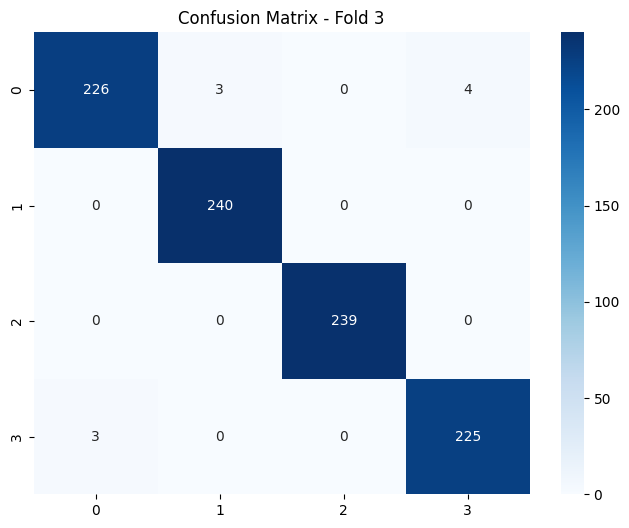

Epoch [1/16], Loss: 1.3864, Accuracy: 0.2479
Epoch [2/16], Loss: 1.3359, Accuracy: 0.4830
Epoch [3/16], Loss: 1.1529, Accuracy: 0.5532
Epoch [4/16], Loss: 0.9632, Accuracy: 0.5830
Epoch [5/16], Loss: 0.9001, Accuracy: 0.6128
Epoch [6/16], Loss: 0.7600, Accuracy: 0.7383
Epoch [7/16], Loss: 0.5920, Accuracy: 0.8011
Epoch [8/16], Loss: 0.3842, Accuracy: 0.8723
Epoch [9/16], Loss: 0.2769, Accuracy: 0.8755
Epoch [10/16], Loss: 0.2357, Accuracy: 0.9149
Epoch [11/16], Loss: 0.1553, Accuracy: 0.9617
Epoch [12/16], Loss: 0.1031, Accuracy: 0.9766
Epoch [13/16], Loss: 0.0454, Accuracy: 0.9787
Epoch [14/16], Loss: 0.1254, Accuracy: 0.9394
Epoch [15/16], Loss: 0.1009, Accuracy: 0.9766
Epoch [16/16], Loss: 0.0237, Accuracy: 0.9840
Fold 4, Accuracy: 0.9840425531914894, Precision: 0.9850275807722616, Recall: 0.9840425531914894, F1 Score: 0.9841520091392595


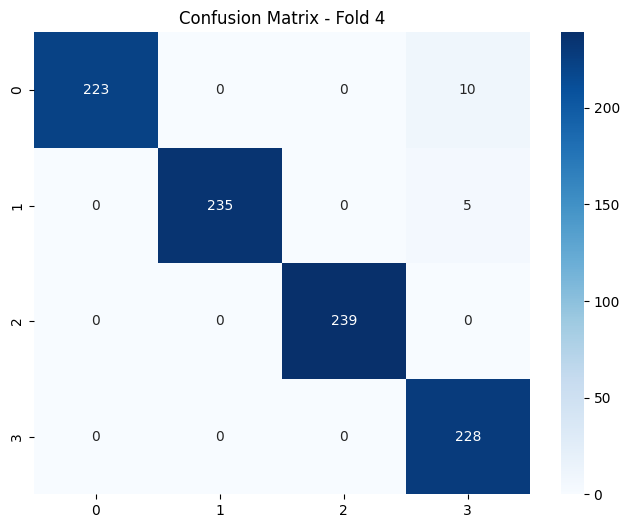

Epoch [1/16], Loss: 1.3879, Accuracy: 0.2553
Epoch [2/16], Loss: 1.3838, Accuracy: 0.2479
Epoch [3/16], Loss: 1.3846, Accuracy: 0.2574
Epoch [4/16], Loss: 1.3864, Accuracy: 0.2543
Epoch [5/16], Loss: 1.3783, Accuracy: 0.2479
Epoch [6/16], Loss: 1.3427, Accuracy: 0.3436
Epoch [7/16], Loss: 1.1615, Accuracy: 0.5298
Epoch [8/16], Loss: 0.9670, Accuracy: 0.6617
Epoch [9/16], Loss: 0.8233, Accuracy: 0.6851
Epoch [10/16], Loss: 0.7102, Accuracy: 0.7309
Epoch [11/16], Loss: 0.4987, Accuracy: 0.8191
Epoch [12/16], Loss: 0.3401, Accuracy: 0.9255
Epoch [13/16], Loss: 0.2195, Accuracy: 0.9181
Epoch [14/16], Loss: 0.1618, Accuracy: 0.8500
Epoch [15/16], Loss: 0.1321, Accuracy: 0.9723
Epoch [16/16], Loss: 0.0638, Accuracy: 0.9819
Fold 5, Accuracy: 0.9819148936170212, Precision: 0.9821965891217305, Recall: 0.9819148936170212, F1 Score: 0.9818916859078382


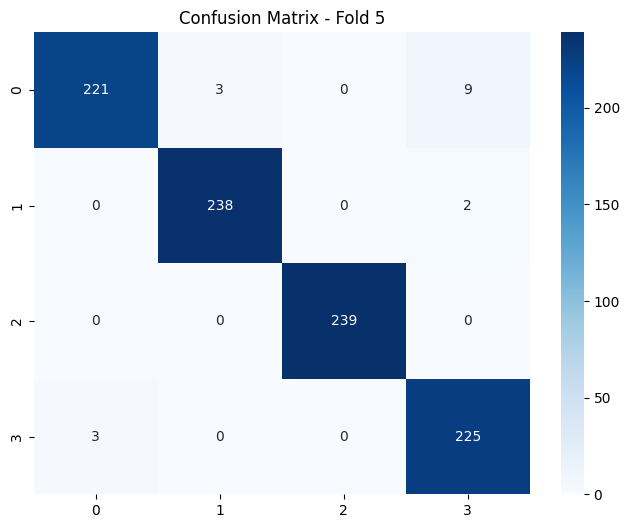

Mean Precision: 0.9840776414188188 +/- 0.0037864316282583497
Mean Recall: 0.9836170212765957 +/- 0.003841589379844214
Mean F1 Score: 0.9836381908080938 +/- 0.0038582233044789837
Mean Accuracy: 0.9836170212765957 +/- 0.003841589379844214
Mean Training Time: 5078.380051994323 +/- 543.2634662993348 seconds
Mean Testing Time: 43.26457505226135 +/- 4.1609210208724425 seconds
Average accuracy of model: 0.9836170212765957


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Dataset class
class CustomDataset(Dataset):
    def __init__(self, X_paths, y, transform=None):
        self.X_paths = X_paths
        self.y = torch.tensor(y, dtype=torch.long)
        self.transform = transform

    def __len__(self):
        return len(self.X_paths)

    def __getitem__(self, idx):
        image = Image.open(self.X_paths[idx]).convert('RGB')
        label = self.y[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# AlexNet architecture
class AlexNet(nn.Module):
    def __init__(self, num_classes=4):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Function to train and evaluate the model
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=16):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)

        # Evaluation on the test set
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = correct / total

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.4f}')

    return accuracy

# Setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initializing lists
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
training_times = []
testing_times = []

batch_size = 128
num_epochs = 16
sum_accuracy=0

# 5 folds cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Looping through the folds
for fold_idx, (train_index, test_index) in enumerate(kf.split(X_paths, y)):
    
    # Creatiing train and test sets for this fold
    X_train_paths, X_test_paths = X_paths[train_index], X_paths[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Defining transformations
    transform = transforms.Compose([
        transforms.Resize((227, 227)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Creating datasets and loaders
    train_dataset = CustomDataset(X_train_paths, y_train, transform=transform)
    test_dataset = CustomDataset(X_test_paths, y_test, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initializing AlexNet model
    model = AlexNet().to(device)

    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)

    # Recording training start time
    start_time_train = time.time()

    # Training and evaluating the model for this fold
    accuracy = train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, num_epochs=num_epochs)

    # Recording training end time
    end_time_train = time.time()

    # Recording testing start time
    start_time_test = time.time()

    # Calculating precision, recall, and F1 score
    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            
    end_time_test = time.time()
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)
    training_times.append(end_time_train - start_time_train)
    testing_times.append(time.time() - start_time_test)
    sum_accuracy+=accuracy
    print(f"Fold {fold_idx + 1}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # To Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Fold {fold_idx + 1}')
    plt.show()

# Calculating mean and standard deviation of metrics and times
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)

mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

mean_training_time = np.mean(training_times)
std_training_time = np.std(training_times)

mean_testing_time = np.mean(testing_times)
std_testing_time = np.std(testing_times)

print(f"Mean Precision: {mean_precision} +/- {std_precision}")
print(f"Mean Recall: {mean_recall} +/- {std_recall}")
print(f"Mean F1 Score: {mean_f1} +/- {std_f1}")
print(f"Mean Accuracy: {mean_accuracy} +/- {std_accuracy}")
print(f"Mean Training Time: {mean_training_time} +/- {std_training_time} seconds")
print(f"Mean Testing Time: {mean_testing_time} +/- {std_testing_time} seconds")

avg_accuracy = sum_accuracy / 5
print("Average accuracy of model:", avg_accuracy)


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X_paths, y, transform=None):
        self.X_paths = X_paths
        self.y = torch.tensor(y, dtype=torch.long)
        self.transform = transform

    def __len__(self):
        return len(self.X_paths)

    def __getitem__(self, idx):
        image = Image.open(self.X_paths[idx]).convert('RGB')
        label = self.y[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
num_classes=4

# Loading pre-trained AlexNet
alexnet_model = models.alexnet(pretrained=True)

# Freezing parameters
for param in alexnet_model.parameters():
    param.requires_grad = False
    
# Getting the number of features in the last layer
num_features = alexnet_model.classifier[6].in_features

# Modifying the last layer
alexnet_model.classifier[6] = nn.Linear(num_features, num_classes)

# Sending model to device
alexnet_model = alexnet_model.to(device)

# Extracting features from the pre-trained model's convolutional layers
def extract_features(model, dataloader):
    features = []
    labels = []
    model.eval()
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            features.extend(outputs.cpu().numpy())
            labels.extend(targets.cpu().numpy())
    return np.array(features), np.array(labels)

# Training and evaluating machine learning algorithms using extracted features
def train_and_evaluate_ml_algorithms(train_features, train_labels, test_features, test_labels):
    # Training and evaluating Naive Bayes classifier
    nb_classifier = GaussianNB()
    nb_classifier.fit(train_features, train_labels)
    nb_accuracy = nb_classifier.score(test_features, test_labels)

    # Training and evaluating SVM classifier
    svm_classifier = SVC()
    svm_classifier.fit(train_features, train_labels)
    svm_accuracy = svm_classifier.score(test_features, test_labels)

    # Training and evaluating KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=4)
    knn_classifier.fit(train_features, train_labels)
    knn_accuracy = knn_classifier.score(test_features, test_labels)

    # Training and evaluating Decision Tree classifier
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(train_features, train_labels)
    dt_accuracy = dt_classifier.score(test_features, test_labels)

    # Training and evaluating Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(train_features, train_labels)
    rf_accuracy = rf_classifier.score(test_features, test_labels)

    return nb_accuracy, svm_accuracy, knn_accuracy, dt_accuracy, rf_accuracy
    
nb_accuracies = []
svm_accuracies = []
knn_accuracies = []
dt_accuracies = []
rf_accuracies = []

# Looping through the folds
for fold_idx, (train_index, test_index) in enumerate(kf.split(X_paths, y)):
    # Create train and test sets for this fold
    X_train_paths, X_test_paths = X_paths[train_index], X_paths[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Defining transformation
    data_transform = transforms.Compose([
        transforms.Resize((227, 227)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Loading and preprocessing images
    train_dataset = CustomDataset(X_train_paths, y_train, transform=data_transform)
    test_dataset = CustomDataset(X_test_paths, y_test, transform=data_transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Extracting features using pre-trained AlexNet
    train_features, train_labels = extract_features(alexnet_model, train_loader)
    test_features, test_labels = extract_features(alexnet_model, test_loader)

    # Training and evaluating machine learning algorithms
    nb_accuracy, svm_accuracy, knn_accuracy, dt_accuracy, rf_accuracy = train_and_evaluate_ml_algorithms(
        train_features, train_labels, test_features, test_labels)
    nb_accuracies.append(nb_accuracy)
    svm_accuracies.append(svm_accuracy)
    knn_accuracies.append(knn_accuracy)
    dt_accuracies.append(dt_accuracy)
    rf_accuracies.append(rf_accuracy)

    print(f"Fold {fold_idx + 1}:")
    print(f"Naive Bayes Accuracy: {nb_accuracy}")
    print(f"SVM Accuracy: {svm_accuracy}")
    print(f"KNN Accuracy: {knn_accuracy}")
    print(f"Decision Tree Accuracy: {dt_accuracy}")
    print(f"Random Forest Accuracy: {rf_accuracy}")

res1=sum(nb_accuracies)/5
res2=sum(svm_accuracies)/5
res3=sum(knn_accuracies)/5
res4=sum(dt_accuracies)/5
res5=sum(rf_accuracies)/5
    
print(f"Average Naive Bayes Accuracy: {res1}")
print(f"Average SVM Accuracy: {res2}")
print(f"Average KNN Accuracy: {res3}")
print(f"Average Decision Tree Accuracy: {res4}")
print(f"Average Random Forest Accuracy: {res5}")


Fold 1:
Naive Bayes Accuracy: 0.7031914893617021
SVM Accuracy: 0.9329787234042553
KNN Accuracy: 0.882127659574468
Decision Tree Accuracy: 0.8931914893617021
Random Forest Accuracy: 0.958936170212766
Fold 2:
Naive Bayes Accuracy: 0.6829787234042553
SVM Accuracy: 0.963404255319149
KNN Accuracy: 0.8782978723404255
Decision Tree Accuracy: 0.9063829787234043
Random Forest Accuracy: 0.9614893617021277
Fold 3:
Naive Bayes Accuracy: 0.6710638297872341
SVM Accuracy: 0.9423404255319149
KNN Accuracy: 0.9072340425531915
Decision Tree Accuracy: 0.8885106382978723
Random Forest Accuracy: 0.9493617021276595
Fold 4:
Naive Bayes Accuracy: 0.7295744680851064
SVM Accuracy: 0.9542553191489362
KNN Accuracy: 0.85
Decision Tree Accuracy: 0.8753191489361702
Random Forest Accuracy: 0.9363829787234042
Fold 5:
Naive Bayes Accuracy: 0.7140425531914894
SVM Accuracy: 0.945531914893617
KNN Accuracy: 0.8723404255319148
Decision Tree Accuracy: 0.8908510638297873
Random Forest Accuracy: 0.9517021276595745
Average Naive